In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Random_dataset/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(dataset.shape)

(10000, 14)


In [ ]:
# show catagorical column

li = []
for i in dataset.columns:
  if dataset[i].dtype == "object":
    li.append(i)

print(li)

['Surname', 'Geography', 'Gender']


In [ ]:
'''
here we segment without first three column
as an train dataset and last column as test
dataset
'''
x = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
# Create Dummy Variable
Geography = pd.get_dummies(x["Geography"], drop_first= True)
Gender = pd.get_dummies(x["Gender"], drop_first = True)

In [ ]:
# adding this value with dataset

x = pd.concat([x, Geography, Gender], axis=1)
x.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False


In [ ]:
x = x.drop(["Geography", "Gender"], axis = 1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
# spliting the dataset into train test split
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

Now We try to make an ANN network

In [ ]:
# import the library
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Initializing the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer with and first hidden layer
classifier.add(Dense(units = 10, kernel_initializer ="uniform", activation = "relu", input_dim = 11))
# Adding the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer ="uniform", activation = "relu"))
# Adding the third layer
classifier.add(Dense(units = 10, kernel_initializer ="uniform", activation = "relu"))
# adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilling the ANN
classifier.compile(optimizer = 'Adamax', loss='binary_crossentropy', metrics = ["accuracy"])

In [ ]:
# feting the ANN to the training set
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs = 20)

Epoch 1/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7989 - loss: 0.5877 - val_accuracy: 0.7955 - val_loss: 0.4579
Epoch 2/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7931 - loss: 0.4514 - val_accuracy: 0.7955 - val_loss: 0.4417
Epoch 3/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8002 - loss: 0.4261 - val_accuracy: 0.7955 - val_loss: 0.4340
Epoch 4/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7955 - loss: 0.4272 - val_accuracy: 0.7955 - val_loss: 0.4303
Epoch 5/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7930 - loss: 0.4352 - val_accuracy: 0.7955 - val_loss: 0.4278
Epoch 6/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8034 - loss: 0.4153 - val_accuracy: 0.8201 - val_loss: 0.4266
Epoch 7/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8231 - loss: 0.4101 - val_accuracy: 0.8217 - val_loss: 0.4247
Epoch 8/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8241 - loss: 0.4180 - val_accuracy: 0

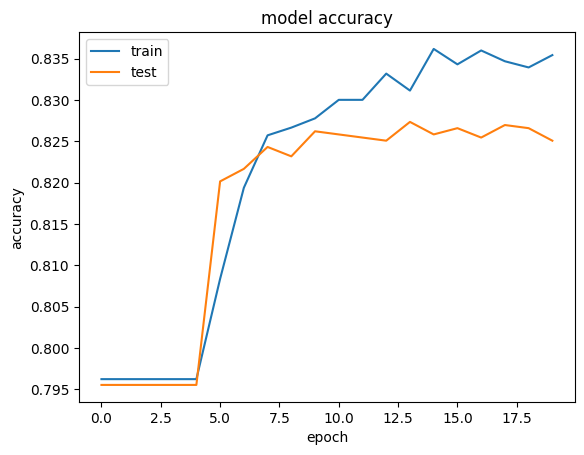

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

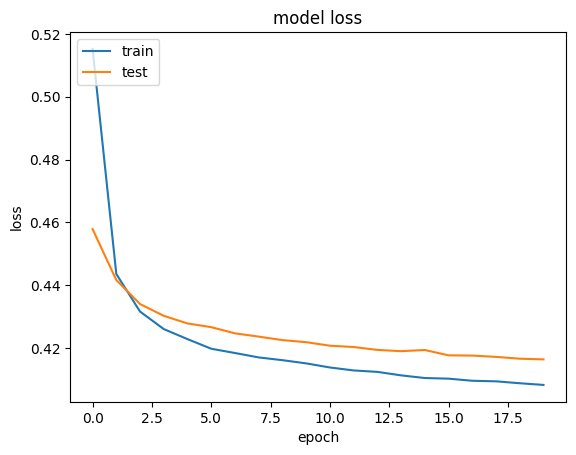

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1559   36]
 [ 293  112]]
